In [1]:
import sys
import os
import numpy as np
import pandas as pd         # for temporal tables, rolling, monthly aggregation
import xarray as xr         # for multi-dimensional array handling
import matplotlib.pyplot as plt  # for plotting
import stackstac
from pystac_client import Client as StacClient
from dask.distributed import Client, LocalCluster

In [2]:
cluster = LocalCluster(
    n_workers=4,             
    threads_per_worker=1,    
    memory_limit="6GB"       
)
client = Client(cluster)
cluster    


LocalCluster(4b8c38f5, 'tcp://127.0.0.1:43951', workers=4, threads=4, memory=22.35 GiB)

In [3]:

import sys, os
sys.path.append(os.path.abspath("../utils"))

# Import plotting functions from your spatial utilities
from spatial_utils import plot_wqi_index_maps, plot_wqi_std_maps
from stack_loader import load_wqi_stack

In [4]:
TAMPA_BAY = (-82.7167, 27.5833, -82.3833, 28.0333)

start_date = "2019-12-01"
end_date = "2024-12-31"

In [5]:
# Load pixel-level Sentinel-2 stack for Tampa Bay
stack = load_wqi_stack(
    bbox=TAMPA_BAY,
    start_date=start_date,
    end_date=end_date,
    epsg=32617,
    max_items=100,
    filter_clouds=True
)

Stack loaded with shape: (26, 5, 4912, 3271)


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


2025-12-13 18:16:47,771 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 4.60 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:16:47,949 - distributed.worker.memory - WARNING - Worker is at 31% memory usage. Resuming worker. Process memory: 1.79 GiB -- Worker memory limit: 5.59 GiB


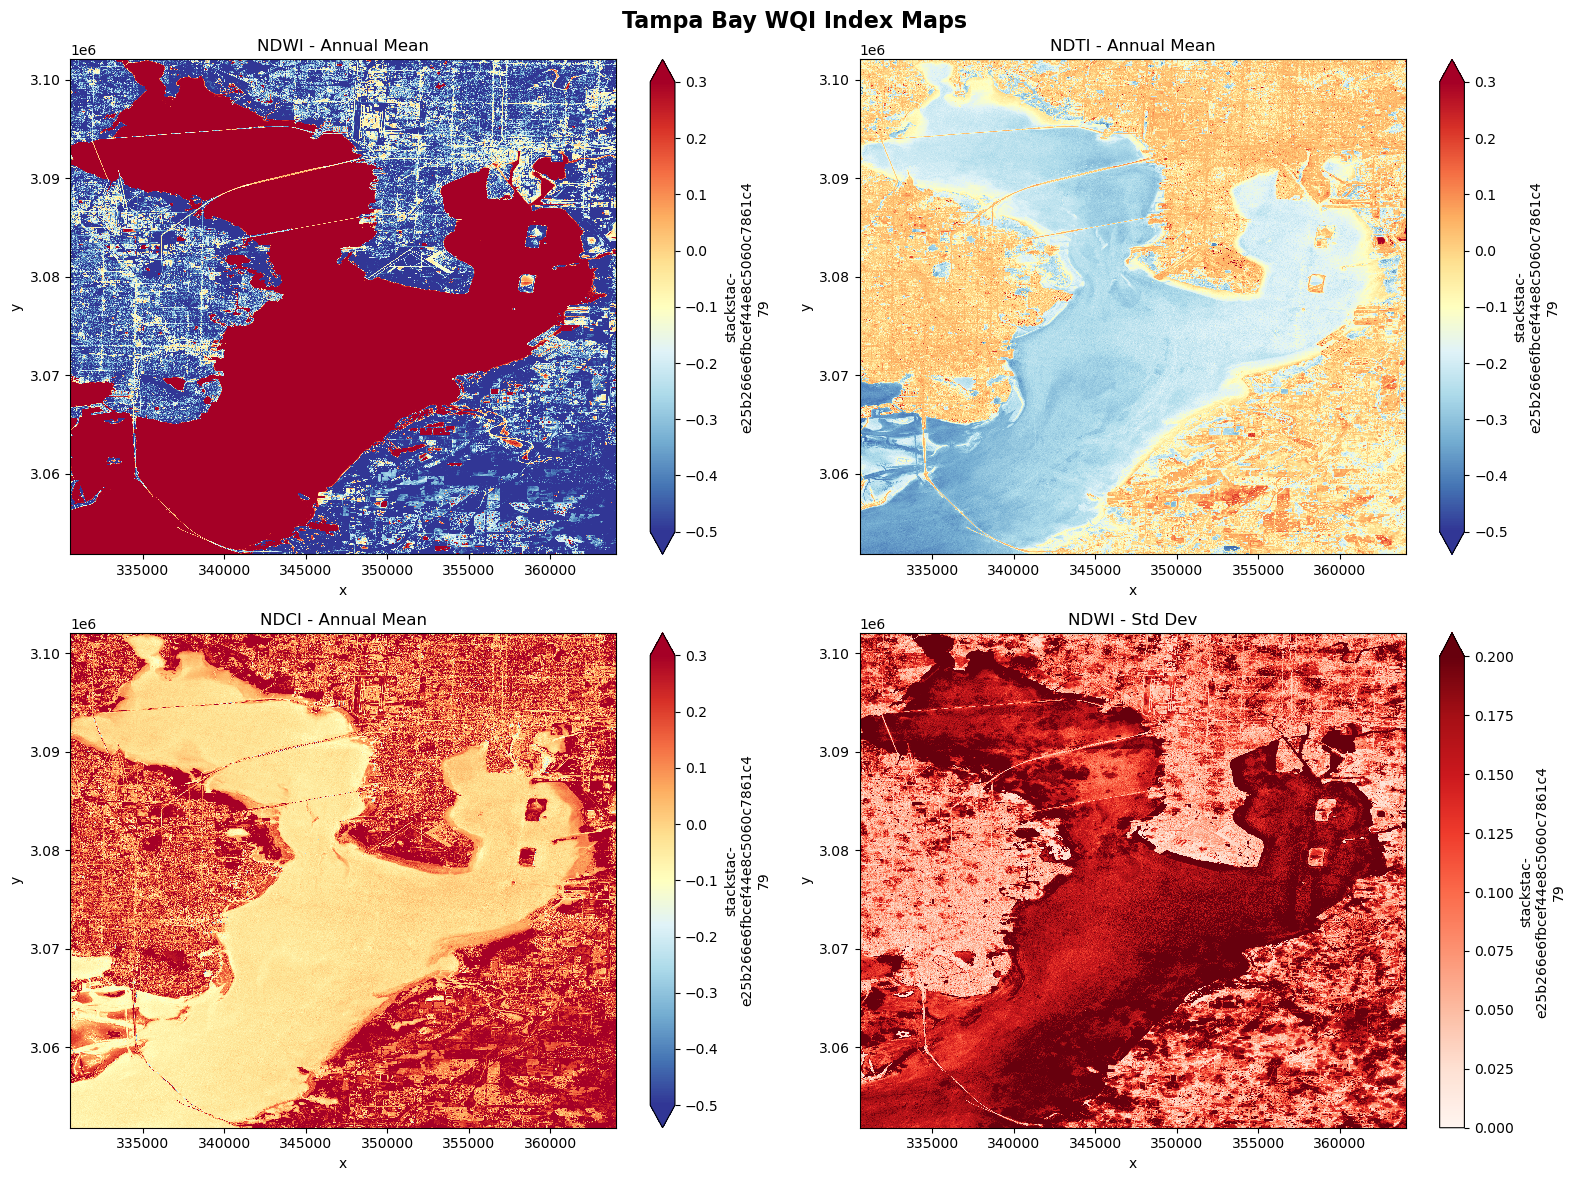

In [6]:
# Annual mean maps + NDWI std map
plot_wqi_index_maps(
    stack,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay WQI Index Maps"
)

2025-12-13 18:19:50,607 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 4.66 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:19:50,824 - distributed.worker.memory - WARNING - Worker is at 32% memory usage. Resuming worker. Process memory: 1.79 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:19:54,868 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 4.18 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:21:31,691 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 4.56 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 18:21:31,892 - distributed.worker.memory - WARNING - Worker is at 65% memory usage. Resuming worker. Process memory: 3.68 GiB 

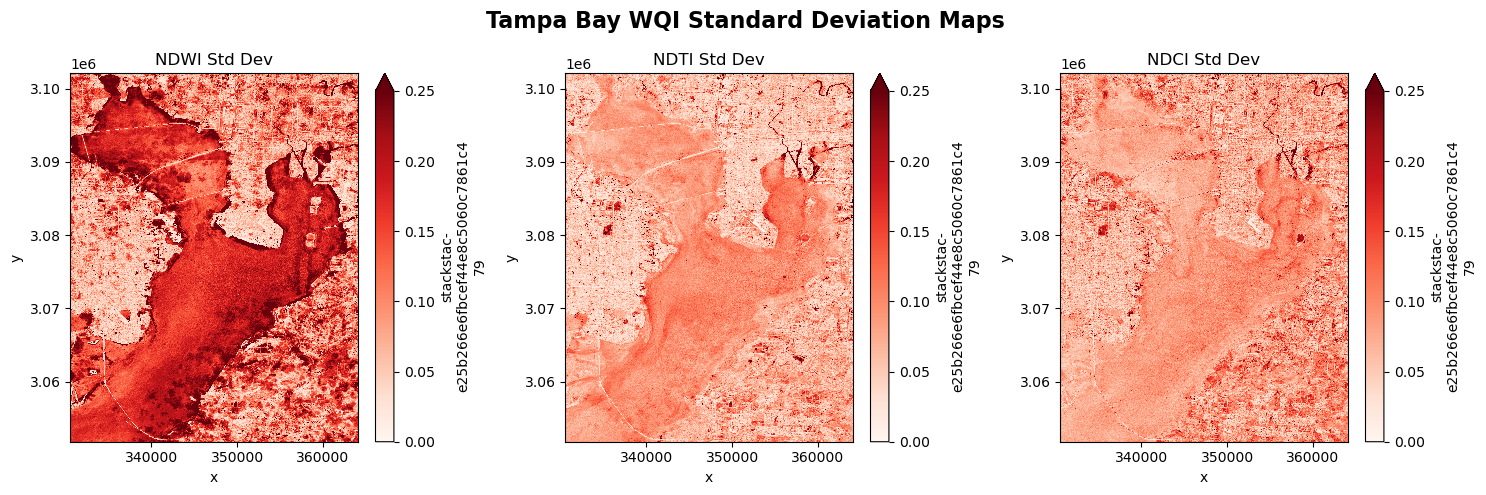

In [7]:
# Standard deviation maps
plot_wqi_std_maps(
    stack,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay WQI Standard Deviation Maps"
)
